In [13]:
import json
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = np.load('../models/track_embeddings.npy')
df = pd.read_csv('../models/track_metadata.csv')

Total playlists: 6226
Total unique tracks: 53953
Total unique artists: 14040


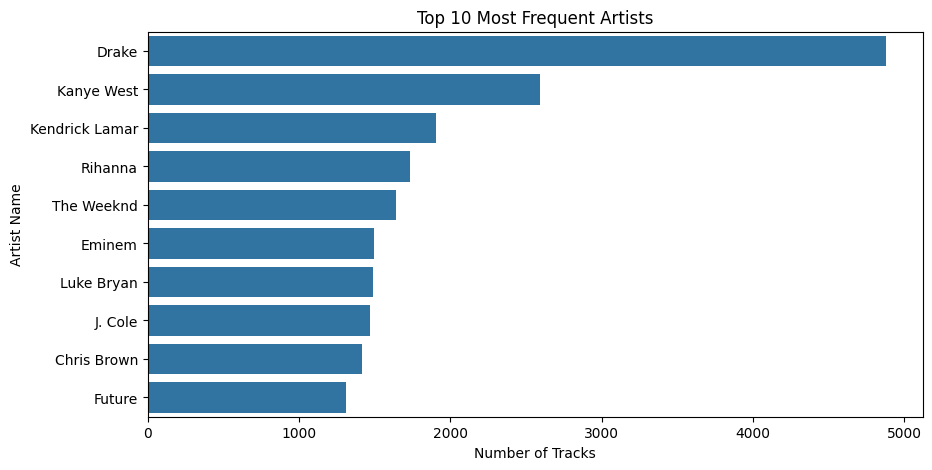


Missing values per column:
playlist_name        0
track_name           0
artist_name          0
album_name           0
text                 0
track_name_length    0
dtype: int64


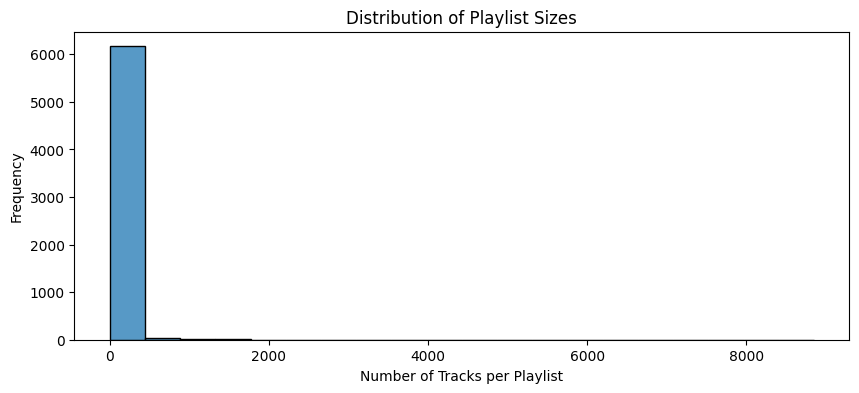

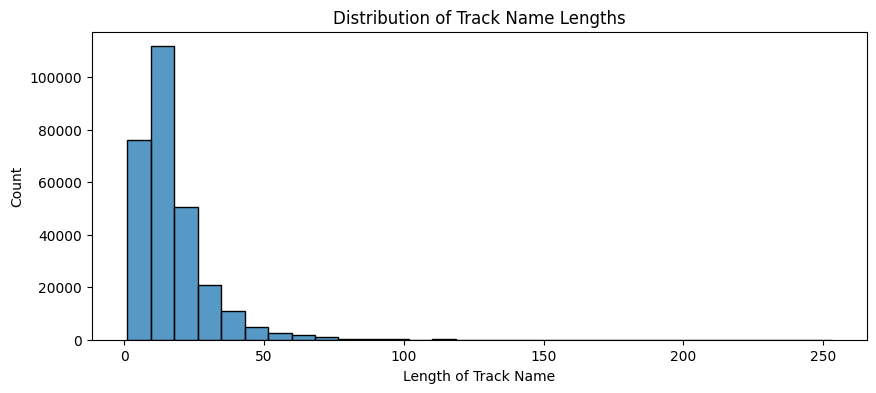

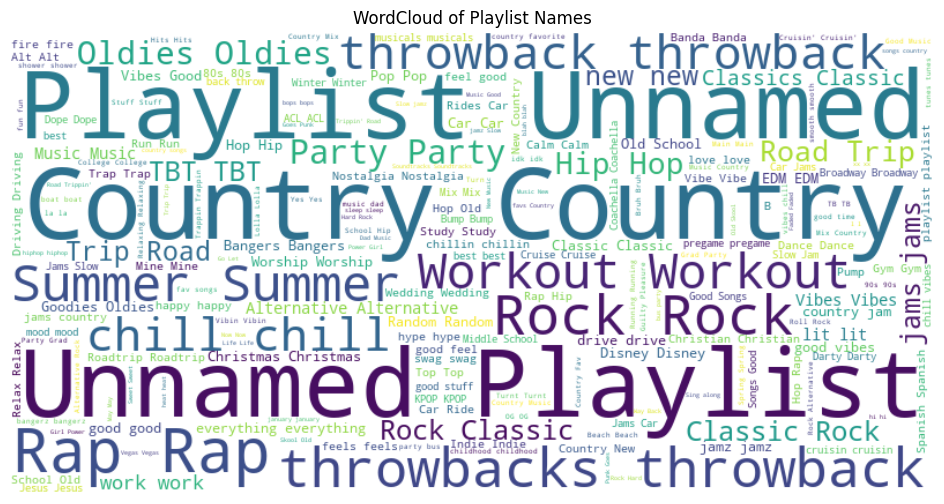

In [16]:
#Data exploration and visualisation
print(f"Total playlists: {df['playlist_name'].nunique()}")
print(f"Total unique tracks: {df['track_name'].nunique()}")
print(f"Total unique artists: {df['artist_name'].nunique()}")

top_artists = df['artist_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()

print("\nMissing values per column:")
print(df.isnull().sum())

df = df.dropna(subset=['track_name', 'artist_name'])

playlist_sizes = df['playlist_name'].value_counts()
plt.figure(figsize=(10, 4))
sns.histplot(playlist_sizes, bins=20)
plt.title('Distribution of Playlist Sizes')
plt.xlabel('Number of Tracks per Playlist')
plt.ylabel('Frequency')
plt.show()

df['track_name_length'] = df['track_name'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 4))
sns.histplot(df['track_name_length'], bins=30)
plt.title('Distribution of Track Name Lengths')
plt.xlabel('Length of Track Name')
plt.ylabel('Count')
plt.show()

from wordcloud import WordCloud

text = ' '.join(df['playlist_name'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Playlist Names")
plt.show()


In [2]:


# with open('../data/playlists_with_tracks.json', 'r') as f:
#     data = json.load(f)
#
# all_tracks = []
#
# for i, playlist in enumerate(data['playlists']):
#     playlist_name = playlist.get('name', f'Unnamed Playlist {i}')
#     tracks = playlist.get('tracks', [])
#
#     if not isinstance(tracks, list) or len(tracks) == 0:
#         continue
#
#     for track in tracks:
#         all_tracks.append({
#             'playlist_name': playlist_name,
#             'track_name': track.get('track_name', ''),
#             'artist_name': track.get('artist_name', ''),
#             'album_name': track.get('album_name', '')
#         })
#
# df = pd.DataFrame(all_tracks)
# df.head()


,playlist_name,track_name,artist_name,album_name
0,Party,Little Swing,AronChupa,Little Swing
1,Party,I'm an Albatraoz,AronChupa,I'm an Albatraoz
2,Party,Yellow Flicker Beat - From The Hunger Games: M...,Lorde,Yellow Flicker Beat
3,Party,White Teeth Teens,Lorde,Pure Heroine
4,Party,Team,Lorde,Pure Heroine


In [4]:
#df['text'] = df['track_name'] + ' by ' + df['artist_name'] + ' from album ' + df['album_name']
#df['text'].head()


0    Little Swing by AronChupa from album Little Swing
1    I'm an Albatraoz by AronChupa from album I'm a...
2    Yellow Flicker Beat - From The Hunger Games: M...
3    White Teeth Teens by Lorde from album Pure Her...
4                Team by Lorde from album Pure Heroine
Name: text, dtype: object

In [5]:
#model = SentenceTransformer('all-MiniLM-L6-v2')
#embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/8782 [00:00<?, ?it/s]

In [6]:
#np.save('../models/track_embeddings.npy', embeddings)
#df.to_csv('../models/track_metadata.csv', index=False)

In [11]:
def recommend_similar_songs(query_text, model, embeddings, metadata_df, top_k=5):
    query_embedding = model.encode([query_text])
    similarities = cosine_similarity(query_embedding, embeddings)[0]
    top_indices = similarities.argsort()[-top_k:][::-1]
    return metadata_df.iloc[top_indices][['track_name', 'artist_name', 'playlist_name']].assign(score=similarities[top_indices])

In [12]:
recommend_similar_songs("calm acoustic piano ballad", model, embeddings, df, top_k=5)


,track_name,artist_name,playlist_name,score
157025,Joyful Calming,Relaxing Piano Music Consort,Study,0.644503
157030,Fur Elise,Michael Silverman,Study,0.637953
157010,The Piano,Michael Silverman,Study,0.623163
157071,Romantic Piano,Massage Music Guru,Study,0.617174
157013,Happiness,Relaxing Piano Music Consort,Study,0.606798
